In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mnist-data-for-digit-recognation:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F7666%2F10873%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240227%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240227T123616Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D70a08750e6b2292c5939a0ab77eb2bc0e641f0df9d86014779cb218ed4aa8ec0d1ac729c4297eaed0191119360684d15e14436145f75520b46e63150e25a3375659ffa30a8555f2d3e417b48cdda0b752e08bf3045e0e9389eb98e4065a3656c507843523416672d9c22659006d1c0b72165d0838621e460b26eecf188485cfb46d7e8768f623f64b7ca6ae7b99ceb68030dbd8868159eb562375f529a5c0ddd4c419544dfc851e59a071a271eb0be1b614580f1a4490af2ddec93b53c84e39f18d3cc6c6eb17965011ec0564f528ba3af43af381cb536b0455d19f5572a5db498f12d08beeb778a33bca3057918a4ffad02229f3f377e73a32f86ebf6a25edb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


The system cannot find the path specified.


OSError: [WinError 1314] A required privilege is not held by the client: '/kaggle/input' -> '..\\input'

In [1]:
import numpy as np
import pandas as pd
import os
for dirname,_,filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization
from tensorflow.keras.utils import plot_model
import os

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
data

NameError: name 'data' is not defined

# Loading Data

In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain,xtest=xtrain/255.0,xtest/255.0

In [6]:
xtrain[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

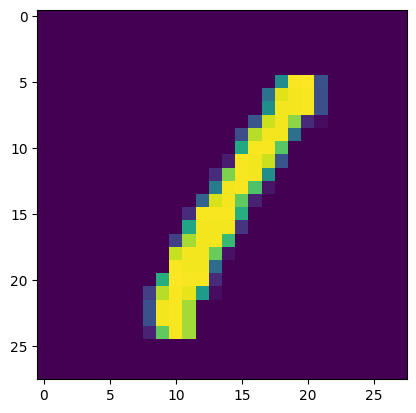

In [5]:
plt.imshow(xtrain[3])

# Building the model

In [3]:
model1 = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(units = 100, activation = 'relu'),
    Dense(units = 10, activation = 'softmax')
])

In [3]:
model2 = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(units = 80, activation = 'relu'),
    BatchNormalization(),
    Dense(units = 40, activation = 'relu'),
    BatchNormalization(),
    Dense(units = 15, activation = 'relu'),
    BatchNormalization(),
    Dense(units = 10, activation = 'softmax')
])

In [4]:
model3 = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 80)                62800     
                                                                 
 batch_normalization (Batch  (None, 80)                320       
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 40)                3240      
                                                                 
 batch_normalization_1 (Bat  (None, 40)                160       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 15)               

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               692352    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [12]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [13]:
model1.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics= ['accuracy'])

In [14]:
# early_stop=tf.keras.callbacks.EarlyStopping(patience=2)
history_norm=model1.fit(xtrain, ytrain, epochs= 20, validation_data=(xtest, ytest))

Epoch 1/20


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9245 - val_loss: 0.1496 - val_accuracy: 0.9573
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1270 - accuracy: 0.9628 - val_loss: 0.1108 - val_accuracy: 0.9672
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0934 - accuracy: 0.9729 - val_loss: 0.1033 - val_accuracy: 0.9695
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0748 - accuracy: 0.9783 - val_loss: 0.0955 - val_accuracy: 0.9735
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0629 - accuracy: 0.9816 - val_loss: 0.0969 - val_accuracy: 0.9727
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0540 - accuracy: 0.9841 - val_loss: 0.0930 - val_accuracy: 0.9736
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0475 - accuracy: 0.9862 - val_loss: 0.0990 - val_accurac

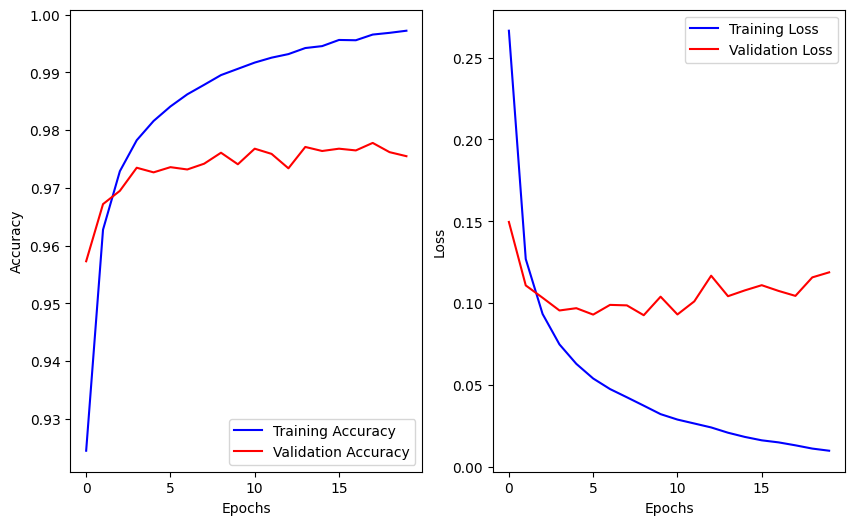

In [19]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history_norm.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history_norm.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_norm.history['loss'], color='b', label='Training Loss')
plt.plot(history_norm.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [15]:
model2.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics= ['accuracy'])

In [16]:
history_norm2=model2.fit(xtrain, ytrain, epochs= 20, validation_data=(xtest, ytest))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3329 - accuracy: 0.9064 - val_loss: 0.1492 - val_accuracy: 0.9572
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1563 - accuracy: 0.9542 - val_loss: 0.1010 - val_accuracy: 0.9694
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1242 - accuracy: 0.9630 - val_loss: 0.0871 - val_accuracy: 0.9734
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1041 - accuracy: 0.9688 - val_loss: 0.0950 - val_accuracy: 0.9716
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0923 - accuracy: 0.9722 - val_loss: 0.0924 - val_accuracy: 0.9726
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9738 - val_loss: 0.0885 - val_accuracy: 0.9740
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0788 - accuracy: 0.9763 - val_loss: 0.0861 - val_accuracy:

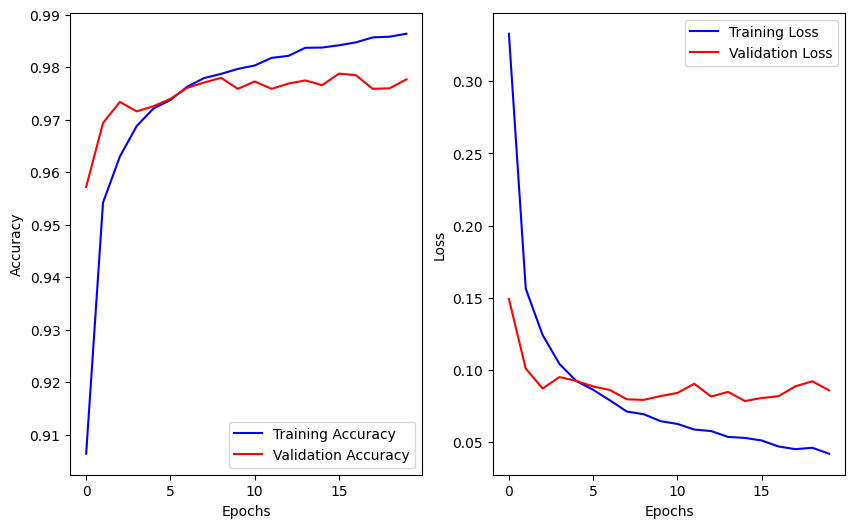

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history_norm2.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history_norm2.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_norm2.history['loss'], color='b', label='Training Loss')
plt.plot(history_norm2.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [17]:
model3.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics= ['accuracy'])

In [18]:
history_norm3=model3.fit(xtrain, ytrain, epochs= 20, validation_data=(xtest, ytest))

Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1548 - accuracy: 0.9537 - val_loss: 0.0643 - val_accuracy: 0.9785
Epoch 2/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0509 - accuracy: 0.9850 - val_loss: 0.0464 - val_accuracy: 0.9842
Epoch 3/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0339 - accuracy: 0.9900 - val_loss: 0.0471 - val_accuracy: 0.9848
Epoch 4/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0494 - val_accuracy: 0.9854
Epoch 5/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0488 - val_accuracy: 0.9867
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0122 - accuracy: 0.9965 - val_loss: 0.0513 - val_accuracy: 0.9859
Epoch 7/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0470 -

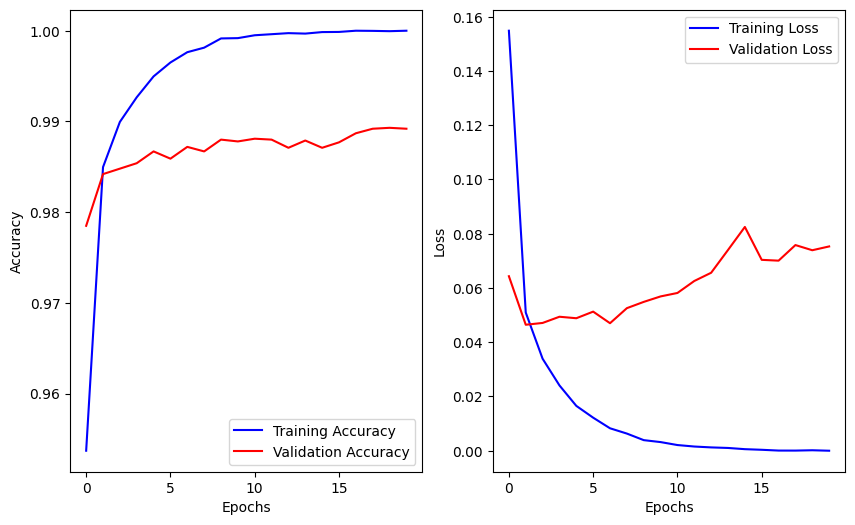

In [21]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history_norm3.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history_norm3.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_norm3.history['loss'], color='b', label='Training Loss')
plt.plot(history_norm3.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [22]:

model1.save('model1.h5')
model2.save('model2.h5')
model3.save('model3.h5')


c:\Users\My computer & laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# prompt: how to access and load saved models and predict output too?

# Access and load saved models
model1 = tf.keras.models.load_model('model1.h5')
model2 = tf.keras.models.load_model('model2.h5')
model3 = tf.keras.models.load_model('model3.h5')

xtest_reshaped = xtest.reshape((-1, 28, 28))

# Predict output using the reshaped input
predictions1 = model1.predict(xtest_reshaped)
predictions2 = model2.predict(xtest_reshaped)
predictions3 = model3.predict(xtest_reshaped)

listt1=[]
listt2=[]
listt3=[]

for i in range(len(xtest)):
  # Print the predictions
  # print('Predictions for model1:')
  mod1=np.argmax(predictions1[i])
  if mod1!=ytest[i]:
    listt1.append(i)
  # print('Predictions for model2:')
  mod2=np.argmax(predictions2[i])
  if mod2!=ytest[i]:
    listt2.append(i)
  # print('Predictions for model3:')
  mod3=np.argmax(predictions3[i])
  if mod3!=ytest[i]:
    listt3.append(i)


313/313 [==============================] - 2s 5ms/step


In [25]:
print(listt1)
print(listt2)
print(listt3)

[33, 95, 247, 259, 274, 308, 321, 340, 381, 445, 447, 582, 610, 613, 619, 646, 684, 691, 720, 740, 760, 810, 846, 881, 900, 947, 951, 959, 965, 1003, 1014, 1039, 1044, 1050, 1112, 1156, 1178, 1181, 1182, 1224, 1226, 1232, 1242, 1247, 1260, 1299, 1319, 1328, 1393, 1395, 1413, 1494, 1500, 1520, 1530, 1549, 1609, 1621, 1642, 1678, 1681, 1709, 1717, 1878, 1901, 1941, 1984, 2004, 2016, 2043, 2053, 2098, 2109, 2118, 2135, 2148, 2174, 2182, 2186, 2272, 2293, 2387, 2414, 2422, 2433, 2462, 2488, 2526, 2578, 2597, 2607, 2630, 2648, 2654, 2730, 2743, 2778, 2810, 2877, 2896, 2915, 2938, 2939, 2953, 2995, 3030, 3060, 3062, 3073, 3117, 3172, 3225, 3384, 3422, 3490, 3503, 3520, 3533, 3550, 3558, 3559, 3565, 3567, 3607, 3749, 3767, 3776, 3796, 3808, 3838, 3853, 3893, 3906, 3941, 3943, 4000, 4065, 4075, 4078, 4163, 4176, 4201, 4224, 4248, 4255, 4300, 4313, 4360, 4374, 4419, 4443, 4497, 4534, 4536, 4571, 4690, 4761, 4807, 4814, 4823, 4860, 4880, 4911, 4943, 4950, 4956, 4966, 4997, 5331, 5600, 5634, 5642

In [27]:
import json

In [28]:
with open('history_norm.json', 'w') as file:
    json.dump(history_norm.history, file)

In [29]:
with open('history_norm2.json', 'w') as file:
    json.dump(history_norm2.history, file)

In [30]:
with open('history_norm3.json', 'w') as file:
    json.dump(history_norm3.history, file)